In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [ ]:
df = pd.read_csv("water_potability.csv")

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.shape

(3276, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


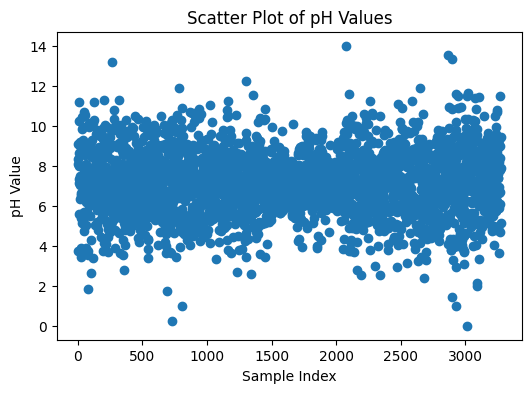

In [ ]:
#Scatter Plot oh pH
plt.figure(figsize=(6,4))
plt.scatter(range(len(df['ph'])), df['ph'])
plt.xlabel("Sample Index")
plt.ylabel("pH Value")
plt.title("Scatter Plot of pH Values")
plt.show()

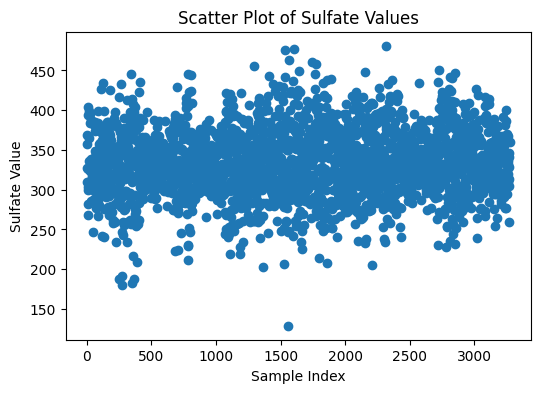

In [ ]:
#Scatter Plot for Sulphates
plt.figure(figsize=(6,4))
plt.scatter(range(len(df['Sulfate'])), df['Sulfate'])
plt.xlabel("Sample Index")
plt.ylabel("Sulfate Value")
plt.title("Scatter Plot of Sulfate Values")
plt.show()

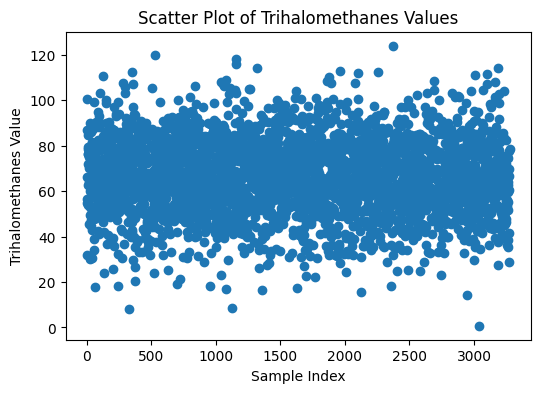

In [ ]:
#Scatter plot for Trihalomethanes
plt.figure(figsize=(6,4))
plt.scatter(range(len(df['Trihalomethanes'])), df['Trihalomethanes'])
plt.xlabel("Sample Index")
plt.ylabel("Trihalomethanes Value")
plt.title("Scatter Plot of Trihalomethanes Values")
plt.show()

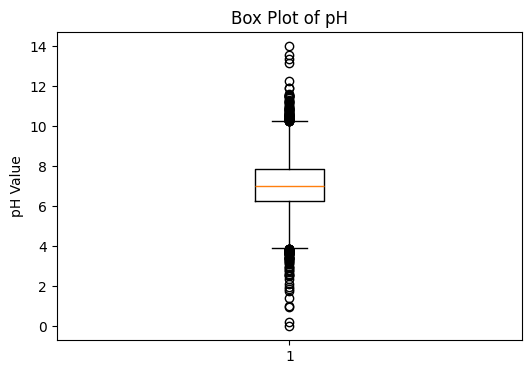

In [93]:
plt.figure(figsize=(6,4))
plt.boxplot(df['ph'])
plt.title("Box Plot of pH")
plt.ylabel("pH Value")
plt.show()

In [ ]:
#Based on the scatter plots using median to fill the missing values
#Filling missing values in pH
# Fill missing values in 'ph' column with its median
df['ph'] = df['ph'].fillna(df['ph'].median())

In [ ]:
# Fill missing values in 'Sulfate' column with its median
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].median())

In [ ]:
# Fill missing values in 'Trihalomethanes' column with its median
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].median())

In [ ]:
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


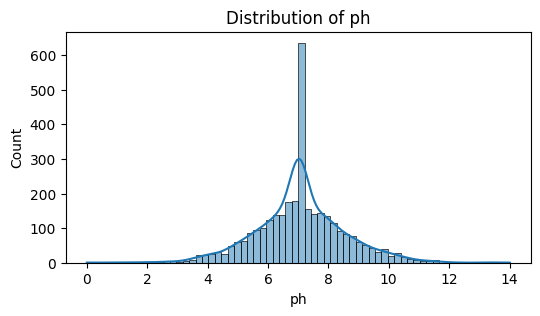

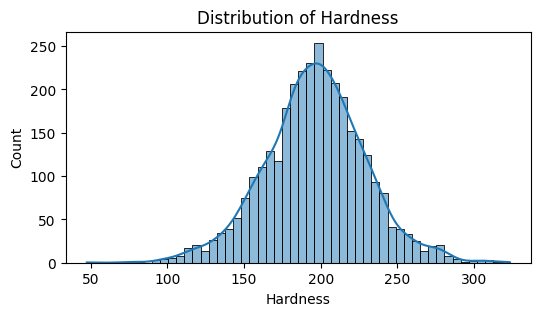

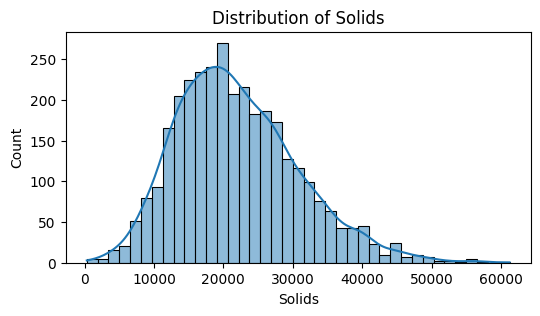

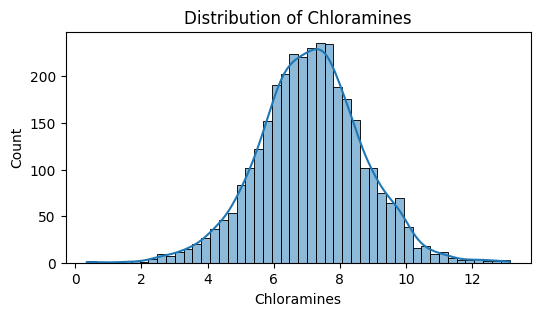

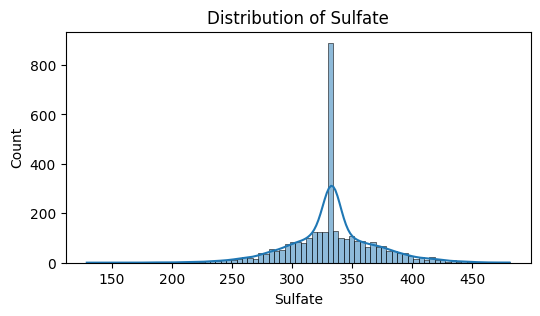

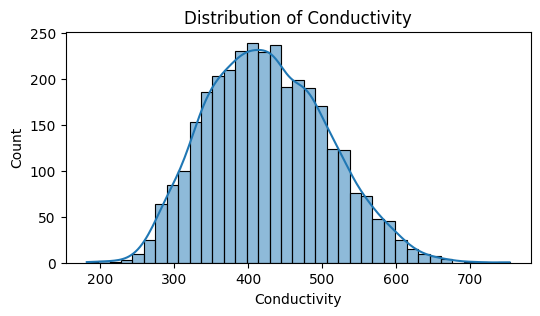

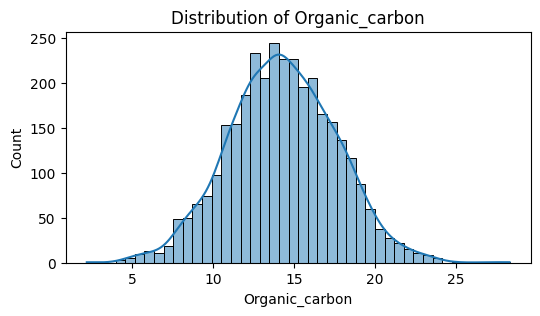

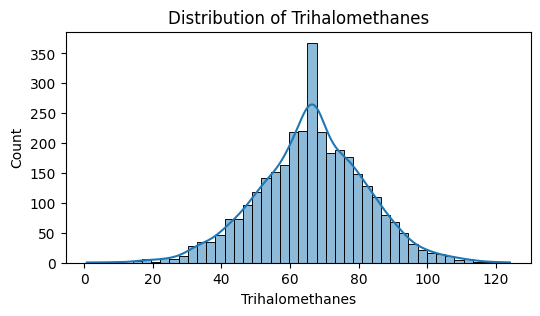

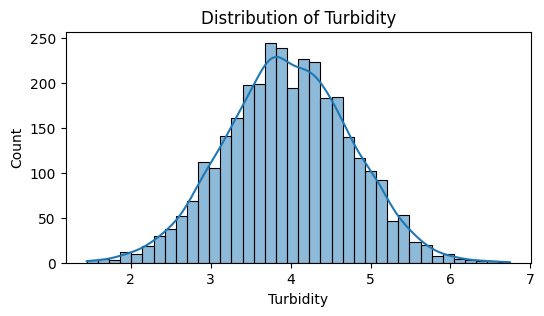

In [ ]:
#Checking for Skewness and Outliers
numeric_cols = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity',
                'Organic_carbon','Trihalomethanes','Turbidity']

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

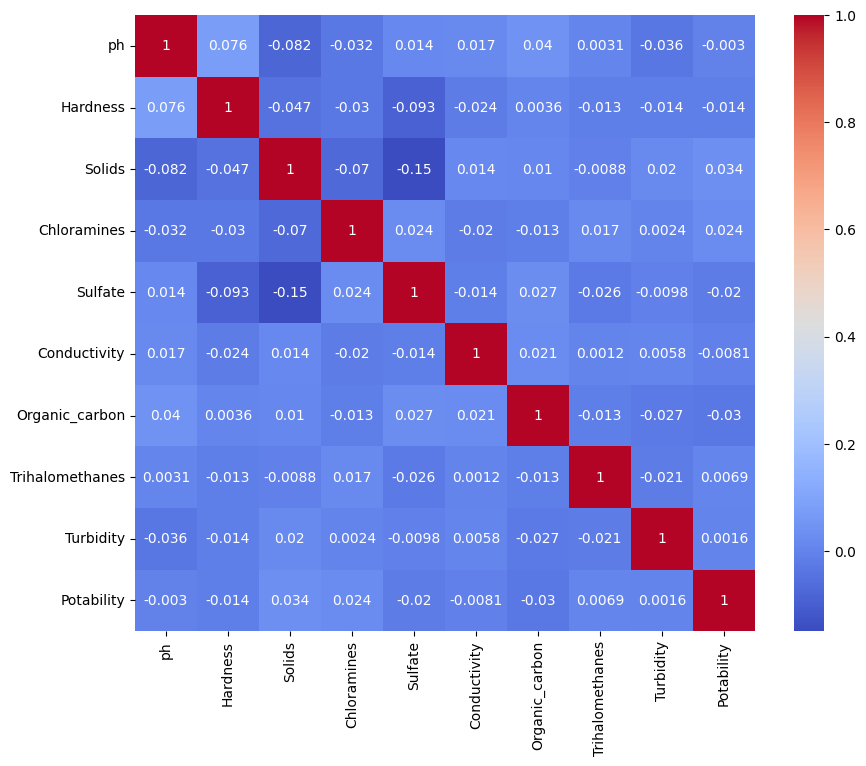

In [91]:
#Checking Correlation using Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');
plt.show()

In [ ]:
#Defining dependent and independent variables
x = df.drop('Potability', axis=1)
y = df['Potability']

In [ ]:
#Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
#Scaling the data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
model_results = []

In [ ]:
#Saving Model Performance Data
from sklearn.metrics import classification_report, accuracy_score

def save_model_metrics(model_name, y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    accuracy = accuracy_score(y_true, y_pred)

    model_results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision (0)": report["0"]["precision"],
        "Recall (0)": report["0"]["recall"],
        "F1-score (0)": report["0"]["f1-score"],
        "Support (0)": report["0"]["support"],
        "Precision (1)": report["1"]["precision"],
        "Recall (1)": report["1"]["recall"],
        "F1-score (1)": report["1"]["f1-score"],
        "Support (1)": report["1"]["support"]
    })

=== Logistic Regression ===
Accuracy: 0.6097560975609756

Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656



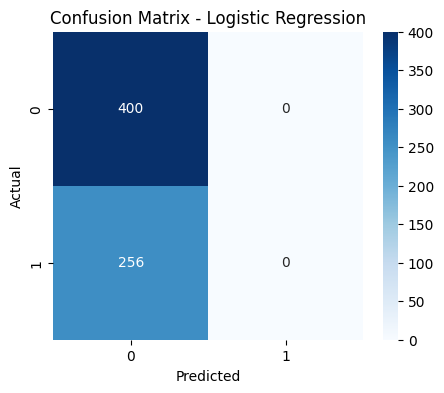

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

log_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
log_model.fit(x_train_scaled, y_train)

# Predict on test set
y_pred_log = log_model.predict(x_test_scaled)

#Save model metrics
save_model_metrics("Logistic Regression", y_test, y_pred_log)

# Evaluate
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log, zero_division=0))

cm = confusion_matrix(y_test, y_pred_log)

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

=== Decision Tree ===
Accuracy: 0.5603053435114503

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.63      0.64       399
           1       0.44      0.45      0.44       256

    accuracy                           0.56       655
   macro avg       0.54      0.54      0.54       655
weighted avg       0.56      0.56      0.56       655



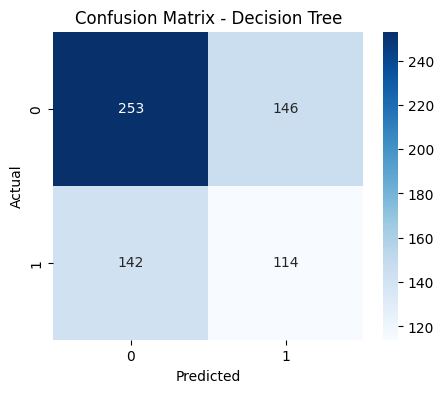

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42,class_weight='balanced')

dt_model.fit(x_train, y_train)

y_pred_dt = dt_model.predict(x_test)

# Save metrics
save_model_metrics("Decision Tree", y_test, y_pred_dt)

# Evaluate
print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=[0,1], yticklabels=[0,1])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

=== Random Forest ===
Accuracy: 0.6427480916030535

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.90      0.75       399
           1       0.61      0.24      0.34       256

    accuracy                           0.64       655
   macro avg       0.63      0.57      0.55       655
weighted avg       0.63      0.64      0.59       655



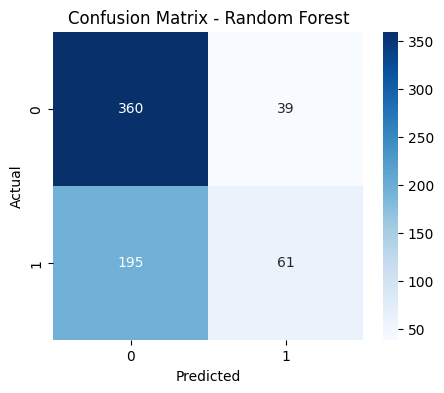

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42,n_estimators=100,class_weight='balanced'
)

rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)

# Save metrics
save_model_metrics("Random Forest", y_test, y_pred_rf)

# Evaluate
print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=[0,1], yticklabels=[0,1])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
#K Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Find best k using GridSearch

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15]
}

grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_knn.fit(x_train_scaled, y_train)

best_k = grid_knn.best_params_['n_neighbors']
print(f"Best k found: {best_k}")

knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(x_train_scaled, y_train)

y_pred_knn = knn_model.predict(x_test_scaled)

# Save metrics
save_model_metrics("KNN", y_test, y_pred_knn)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_knn, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Not Potable', 'Potable'],yticklabels=['Not Potable', 'Potable'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"KNN Confusion Matrix (k={best_k})")
plt.show()

ValueError: 
All the 35 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py", line 239, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_base.py", line 478, in _fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1107, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


Accuracy: 0.5923664122137404

Classification Report:

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       399
           1       0.48      0.45      0.46       256

    accuracy                           0.59       655
   macro avg       0.57      0.57      0.57       655
weighted avg       0.59      0.59      0.59       655



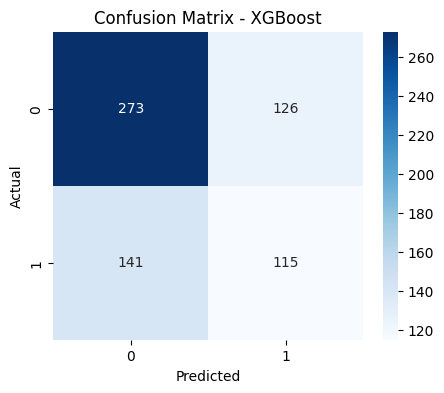

In [ ]:
#XG Boost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(eval_metric='logloss',random_state=42,scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1])

xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)

# Save metrics
save_model_metrics("XGBoost", y_test, y_pred_xgb)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_xgb, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=[0,1], yticklabels=[0,1])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
#Displaying Model Metrics

results_df = pd.DataFrame(model_results)
results_df

,Model,Accuracy,Precision (0),Recall (0),F1-score (0),Support (0),Precision (1),Recall (1),F1-score (1),Support (1)
0,Decision Tree,0.560305,0.640506,0.634085,0.637280,399.0,0.438462,0.445312,0.441860,256.0
1,Random Forest,0.642748,0.648649,0.902256,0.754717,399.0,0.610000,0.238281,0.342697,256.0
2,XGBoost,0.592366,0.659420,0.684211,0.671587,399.0,0.477178,0.449219,0.462777,256.0


In [ ]:
results_df.sort_values(by="F1-score (1)", ascending=False)

,Model,Accuracy,Precision (0),Recall (0),F1-score (0),Support (0),Precision (1),Recall (1),F1-score (1),Support (1)
2,XGBoost,0.592366,0.659420,0.684211,0.671587,399.0,0.477178,0.449219,0.462777,256.0
0,Decision Tree,0.560305,0.640506,0.634085,0.637280,399.0,0.438462,0.445312,0.441860,256.0
1,Random Forest,0.642748,0.648649,0.902256,0.754717,399.0,0.610000,0.238281,0.342697,256.0


In [ ]:
results_df.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy,Precision (0),Recall (0),F1-score (0),Support (0),Precision (1),Recall (1),F1-score (1),Support (1)
1,Random Forest,0.642748,0.648649,0.902256,0.754717,399.0,0.610000,0.238281,0.342697,256.0
2,XGBoost,0.592366,0.659420,0.684211,0.671587,399.0,0.477178,0.449219,0.462777,256.0
0,Decision Tree,0.560305,0.640506,0.634085,0.637280,399.0,0.438462,0.445312,0.441860,256.0


In [ ]:
print("Best Model :",results_df.loc[results_df['F1-score (1)'].idxmax(), 'Model'])

Best Model : XGBoost


In [ ]:
#Hyperparameters Tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

In [ ]:
xgb = XGBClassifier(
    random_state=42,
    eval_metric='logloss'
)

grid_xgb = GridSearchCV(
    xgb,
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_xgb.fit(x_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='f1')

In [ ]:
print("Best Parameters:", grid_xgb.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [ ]:
final_model = XGBClassifier(
    **grid_xgb.best_params_,
    random_state=42,
    eval_metric='logloss'
)

final_model.fit(x_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

Final Tuned XGBoost Model
Accuracy: 0.6412213740458015
              precision    recall  f1-score   support

           0       0.67      0.80      0.73       399
           1       0.56      0.39      0.46       256

    accuracy                           0.64       655
   macro avg       0.62      0.60      0.60       655
weighted avg       0.63      0.64      0.63       655



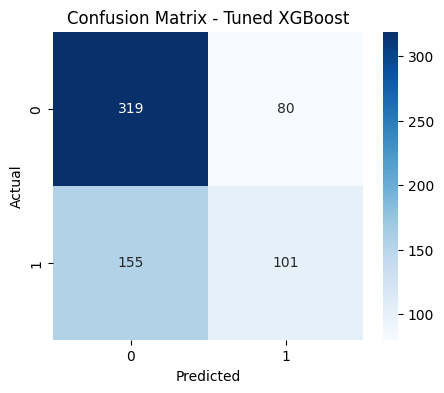

In [ ]:
#Final Model Metrics
y_pred_final = final_model.predict(x_test_scaled)

print("Final Tuned XGBoost Model")
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final, zero_division=0))

cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned XGBoost")
plt.show()

In [ ]:
#Trying to increase performance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
scale_pos_weight

np.float64(1.563600782778865)

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [scale_pos_weight, scale_pos_weight * 1.2]
}

In [ ]:
GridSearchCV(
    xgb,
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200],
                         'scale_pos_weight': [np.float64(1.563600782778865),
                                              np.float64(1.8763209393346378)],
                         'subsample': [0.8, 1.0]},
             scoring='f1')

In [ ]:
# Fit GridSearchCV
grid_xgb.fit(x_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='f1')

In [ ]:
# Retrain final model on full training set using best parameters
final_model = XGBClassifier(
    **grid_xgb.best_params_,
    random_state=42,
    eval_metric='logloss'
)
final_model.fit(x_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# Predict on test set
y_pred_final = final_model.predict(x_test_scaled)

Final Tuned XGBoost Model
Accuracy: 0.6412213740458015
              precision    recall  f1-score   support

           0       0.67      0.80      0.73       399
           1       0.56      0.39      0.46       256

    accuracy                           0.64       655
   macro avg       0.62      0.60      0.60       655
weighted avg       0.63      0.64      0.63       655



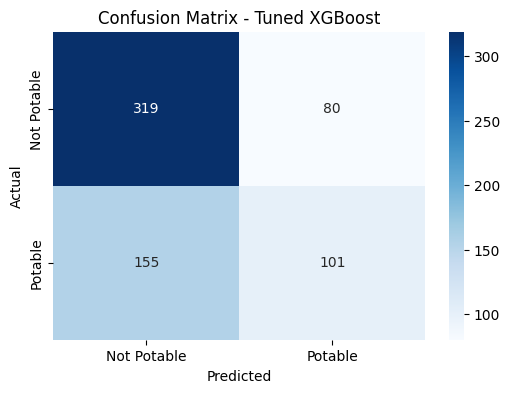

In [ ]:
print("Final Tuned XGBoost Model")
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Potable','Potable'],
            yticklabels=['Not Potable','Potable'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned XGBoost")
plt.show()

In [ ]:
import joblib
joblib.dump(final_model, "water_potability_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Final tuned XGBoost model and scaler saved successfully!")

Final tuned XGBoost model and scaler saved successfully!


In [ ]:
#Define a parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
rf = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(
    rf,
    param_grid_rf,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    refit=True
)

In [ ]:
grid_rf.fit(x_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [ ]:
final_rf = grid_rf.best_estimator_
final_rf.fit(x_train_scaled, y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=200, random_state=42)

In [ ]:
y_pred_rf = final_rf.predict(x_test_scaled)

Tuned Random Forest Performance
Accuracy: 0.6676829268292683
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       400
           1       0.66      0.31      0.42       256

    accuracy                           0.67       656
   macro avg       0.66      0.60      0.59       656
weighted avg       0.66      0.67      0.63       656



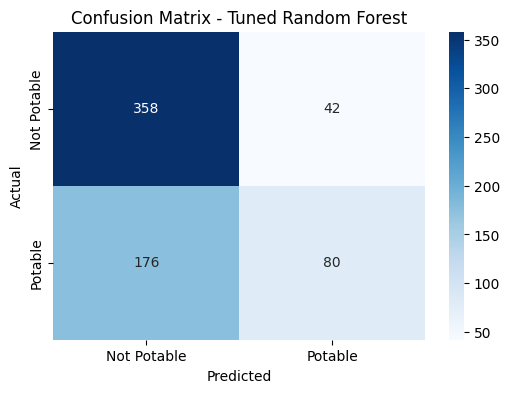

In [ ]:
# Evaluate
print("Tuned Random Forest Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Potable','Potable'],
            yticklabels=['Not Potable','Potable'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()

In [ ]:
# Save model
joblib.dump(final_rf, "water_potability_rf_model.pkl")
print("Random Forest model saved successfully!")

Random Forest model saved successfully!


In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
def recommend_treatment(row):
    recommendations = []

    if row['ph'] < 6.5:
        recommendations.append("Add lime / alkaline treatment")
    elif row['ph'] > 8.5:
        recommendations.append("Add acid / pH correction")

    if row['Hardness'] > 500:
        recommendations.append("Softening (ion exchange / lime soda)")

    if row['Solids'] > 500:
        recommendations.append("Sedimentation / Filtration")

    if row['Chloramines'] < 0.2:
        recommendations.append("Add disinfectant")
    elif row['Chloramines'] > 2:
        recommendations.append("Dechlorination")

    if row['Sulfate'] > 400:
        recommendations.append("Reverse Osmosis / Ion Exchange")

    if row['Conductivity'] > 1000:
        recommendations.append("Desalination / RO")

    if row['Organic_carbon'] > 10:
        recommendations.append("Advanced oxidation / Activated carbon")

    if row['Trihalomethanes'] > 0.1:
        recommendations.append("Limit chlorination / Remove precursors")

    if row['Turbidity'] > 5:
        recommendations.append("Filtration / Sedimentation")

    if not recommendations:
        return "Water within acceptable limits"

    return "; ".join(recommendations)

df['Recommended_Treatment'] = df.apply(recommend_treatment, axis=1)

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Recommended_Treatment
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,Sedimentation / Filtration; Dechlorination; Ad...
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0,Add lime / alkaline treatment; Sedimentation /...
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0,Sedimentation / Filtration; Dechlorination; Ad...
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,Sedimentation / Filtration; Dechlorination; Ad...
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,Add acid / pH correction; Sedimentation / Filt...


In [ ]:
def assign_usecases(row):
    usecases = []

    # Potable drinking
    if 6.5 <= row['ph'] <= 8.5 and row['Turbidity'] <= 5 and row['Trihalomethanes'] <= 0.1 and row['Sulfate'] <= 400:
        usecases.append("Drinking Water")

    # Domestic / general
    if row['Hardness'] <= 500 and row['Solids'] <= 500:
        usecases.append("Domestic Use (washing, cleaning)")

    # Agriculture
    if row['Sulfate'] <= 400 and row['Conductivity'] <= 1000:
        usecases.append("Agricultural Use")

    # Energy / cooling / hydropower
    if row['Conductivity'] <= 1500 and row['Turbidity'] <= 10:
        usecases.append("Energy Production (cooling / hydropower)")

    # Municipal / public
    if row['Chloramines'] >= 0.2 and row['Turbidity'] <= 5:
        usecases.append("Public & Municipal Use")

    # Medical / scientific
    if row['Organic_carbon'] <= 10 and row['Trihalomethanes'] <= 0.1:
        usecases.append("Medical & Scientific Uses (STRICT)")

    return "; ".join(usecases)

df['Use_Cases'] = df.apply(assign_usecases, axis=1)

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Recommended_Treatment,Use_Cases
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,Sedimentation / Filtration; Dechlorination; Ad...,Agricultural Use; Energy Production (cooling /...
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0,Add lime / alkaline treatment; Sedimentation /...,Agricultural Use; Energy Production (cooling /...
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0,Sedimentation / Filtration; Dechlorination; Ad...,Agricultural Use; Energy Production (cooling /...
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,Sedimentation / Filtration; Dechlorination; Ad...,Agricultural Use; Energy Production (cooling /...
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,Add acid / pH correction; Sedimentation / Filt...,Agricultural Use; Energy Production (cooling /...


In [ ]:
df.to_csv("water_potability_enriched.csv", index=False)
print("CSV saved with Recommended Treatment and Use Cases!")

CSV saved with Recommended Treatment and Use Cases!


In [ ]:
feature_columns = x.columns.tolist()


In [ ]:
import joblib

joblib.dump(feature_columns, "features.pkl")

['features.pkl']

In [ ]:
from google.colab import files
files.download("features.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>